In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from random import randint
from pattern.en import pluralize, singularize
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

def drop_stop_words(sentence):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

def remove_punctuation(sentence):
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    return sentence

def to_lowercase(sentence):
    return sentence.lower()

def negate_sentence(sentence):
    negation_words = ['not', 'no', 'never', 'none', 'nothing', 'nobody', 'neither', 'nowhere', 'hardly', 'scarcely', 'barely', 'don’t', 'isn’t', 'wasn’t', 'shouldn’t', 'wouldn’t', 'couldn’t', 'won’t', 'can’t', 'doesn’t']
    word_tokens = word_tokenize(sentence)
    negated_sentence = []
    negated = False

    for word in word_tokens:
        if word in negation_words:
            negated = not negated
            continue
        negated_sentence.append("not " + word if negated else word)

    return ' '.join(negated_sentence)

def return_random_number(begin, end):
    return randint(begin, end)

def delete_random_character(sentence):
    """
    This function takes a sentence, randomly selects a word, then randomly deletes a character from it.
    """
    sample_tokenized = nltk.word_tokenize(sentence)

    # Select a random word
    random_word_index = 0
    random_word_selected = False

    while not random_word_selected:
        random_word_index = return_random_number(0, len(sample_tokenized)-1)
        if len(sample_tokenized[random_word_index]) > 2:
            random_word_selected = True

    selected_word = sample_tokenized[random_word_index]

    # Delete a random character
    random_char_index = return_random_number(1, len(selected_word)-2)
    perturbed_word = selected_word[:random_char_index] + selected_word[random_char_index+1:]

    # Reconstruct the perturbed sample
    perturbed_sample = " ".join(sample_tokenized[:random_word_index] + [perturbed_word] + sample_tokenized[random_word_index+1:])

    return perturbed_sample

def insert_random_character(sentence):
    """
    This function takes a sentence, randomly selects a word, then randomly inserts a character into it.
    """
    sample_tokenized = nltk.word_tokenize(sentence)

    # Select a random word
    random_word_index = 0
    random_word_selected = False

    while not random_word_selected:
        random_word_index = return_random_number(0, len(sample_tokenized)-1)
        if len(sample_tokenized[random_word_index]) > 2:
            random_word_selected = True

    selected_word = sample_tokenized[random_word_index]

    # Insert a random character
    random_char_index = return_random_number(1, len(selected_word)-1)
    random_char_code = return_random_number(97, 122)
    random_char = chr(random_char_code)

    perturbed_word = selected_word[:random_char_index] + random_char + selected_word[random_char_index:]

    # Reconstruct the perturbed sample
    perturbed_sample = " ".join(sample_tokenized[:random_word_index] + [perturbed_word] + sample_tokenized[random_word_index+1:])

    return perturbed_sample

def random_changing_type():
    return 'FirstChar' if randint(1, 2) == 1 else 'AllChars'

def change_letter_case(sentence):
    """
    This function takes a sentence, randomly selects a word, then changes the case of the first character
    or all characters in that word.
    """
    sample_tokenized = nltk.word_tokenize(sentence)

    # Select a random word
    random_word_index = 0
    random_word_selected = False

    while not random_word_selected:
        random_word_index = return_random_number(0, len(sample_tokenized)-1)
        if len(sample_tokenized[random_word_index]) > 2:
            random_word_selected = True

    selected_word = sample_tokenized[random_word_index]

    # Change the letter case
    change_type = random_changing_type()
    temp_word = ""

    if change_type == 'FirstChar':
        # Toggle case of the first character
        char = selected_word[0]
        temp_word = char.lower() if char.isupper() else char.upper()
        temp_word += selected_word[1:]
    elif change_type == 'AllChars':
        # Toggle case of all characters
        for char in selected_word:
            temp_word += char.lower() if char.isupper() else char.upper()

    # Reconstruct the perturbed sample
    perturbed_sample = " ".join(sample_tokenized[:random_word_index] + [temp_word] + sample_tokenized[random_word_index+1:])

    return perturbed_sample

def generate_misspelling(word):
    """
    This function takes a word and generates a misspelling by randomly altering a character.
    """
    if len(word) > 1:
        random_char_index = return_random_number(0, len(word) - 1)
        random_char_code = return_random_number(97, 122)
        random_char = chr(random_char_code)

        misspelled_word = word[:random_char_index] + random_char + word[random_char_index+1:]
        return misspelled_word
    else:
        return word

def apply_misspellings(sentence, max_perturb=10):
    """
    This function takes a sentence and applies misspelling perturbations by randomly altering characters in words.
    """
    sample_tokenized = nltk.word_tokenize(sentence)
    perturbed_sample = sentence
    word_replaced = False

    num_replacements = 0
    while num_replacements < min(max_perturb, len(sample_tokenized)):
        random_word_index = return_random_number(0, len(sample_tokenized) - 1)
        selected_word = sample_tokenized[random_word_index]

        misspelled_word = generate_misspelling(selected_word)

        if misspelled_word != selected_word:
            perturbed_sample = perturbed_sample.replace(selected_word, misspelled_word, 1)
            num_replacements += 1
            word_replaced = True

    return perturbed_sample if word_replaced else sentence

def repeat_random_character(sentence):
    """
    This function takes a sentence, randomly selects a word, then randomly repeats a character in that word.
    """
    sample_tokenized = nltk.word_tokenize(sentence)

    # Select a random word
    random_word_index = 0
    random_word_selected = False

    while not random_word_selected:
        random_word_index = return_random_number(0, len(sample_tokenized)-1)
        if len(sample_tokenized[random_word_index]) > 2:
            random_word_selected = True

    selected_word = sample_tokenized[random_word_index]

    # Repeat a random character
    random_char_index = return_random_number(1, len(selected_word)-2)
    repeated_char = selected_word[random_char_index]

    perturbed_word = selected_word[:random_char_index] + repeated_char + selected_word[random_char_index:]

    # Reconstruct the perturbed sample
    perturbed_sample = " ".join(sample_tokenized[:random_word_index] + [perturbed_word] + sample_tokenized[random_word_index+1:])

    return perturbed_sample

def return_adjacent_char(input_char):

    if (input_char == 'a'):
        return 's'

    elif (input_char == 'b'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'v'
        else:
            return 'n'

    elif (input_char == 'c'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'x'
        else:
            return 'v'

    elif (input_char == 'd'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 's'
        else:
            return 'f'

    elif (input_char == 'e'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'w'
        else:
            return 'r'

    elif (input_char == 'f'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'd'
        else:
            return 'g'

    elif (input_char == 'g'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'f'
        else:
            return 'h'

    elif (input_char == 'h'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'g'
        else:
            return 'j'

    elif (input_char == 'i'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'u'
        else:
            return 'o'

    elif (input_char == 'j'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'h'
        else:
            return 'k'

    elif (input_char == 'k'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'j'
        else:
            return 'l'

    elif (input_char == 'l'):
        return 'k'

    elif (input_char == 'm'):
        return 'n'

    elif (input_char == 'n'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'b'
        else:
            return 'm'

    elif (input_char == 'o'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'i'
        else:
            return 'p'

    elif (input_char == 'p'):
        return 'o'

    elif (input_char == 'q'):
        return 'w'

    elif (input_char == 'r'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'e'
        else:
            return 't'

    elif (input_char == 's'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'a'
        else:
            return 'd'

    elif (input_char == 't'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'r'
        else:
            return 'y'

    elif (input_char == 'u'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'y'
        else:
            return 'i'

    elif (input_char == 'v'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'c'
        else:
            return 'b'

    elif (input_char == 'w'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'q'
        else:
            return 'e'

    elif (input_char == 'x'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'z'
        else:
            return 'c'

    elif (input_char == 'y'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 't'
        else:
            return 'u'

    elif (input_char == 'z'):
        return 'x'
    #---------------------------------------------
    elif (input_char == 'A'):
        return 'S'

    elif (input_char == 'B'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'V'
        else:
            return 'N'

    elif (input_char == 'C'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'X'
        else:
            return 'V'

    elif (input_char == 'D'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'S'
        else:
            return 'F'

    elif (input_char == 'E'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'W'
        else:
            return 'R'

    elif (input_char == 'F'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'D'
        else:
            return 'G'

    elif (input_char == 'G'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'F'
        else:
            return 'H'

    elif (input_char == 'H'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'G'
        else:
            return 'J'

    elif (input_char == 'I'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'U'
        else:
            return 'O'

    elif (input_char == 'J'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'H'
        else:
            return 'K'

    elif (input_char == 'K'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'J'
        else:
            return 'L'

    elif (input_char == 'L'):
        return 'K'

    elif (input_char == 'M'):
        return 'N'

    elif (input_char == 'N'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'B'
        else:
            return 'M'

    elif (input_char == 'O'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'I'
        else:
            return 'P'

    elif (input_char == 'P'):
        return 'O'

    elif (input_char == 'Q'):
        return 'W'

    elif (input_char == 'R'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'E'
        else:
            return 'T'

    elif (input_char == 'S'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'A'
        else:
            return 'D'

    elif (input_char == 'T'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'R'
        else:
            return 'Y'

    elif (input_char == 'U'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'Y'
        else:
            return 'I'

    elif (input_char == 'V'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'C'
        else:
            return 'B'

    elif (input_char == 'W'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'Q'
        else:
            return 'E'

    elif (input_char == 'X'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'Z'
        else:
            return 'C'

    elif (input_char == 'Y'):
        which_adjacent = return_random_number(1, 2)
        if (which_adjacent == 1):
            return 'T'
        else:
            return 'U'

    elif (input_char == 'Z'):
        return 'X'

    else:
        return '*'

def replace_with_adjacent_character(sentence):
    """
    This function takes a sentence, randomly selects a word, then randomly replaces a character in that word.
    """
    sample_tokenized = nltk.word_tokenize(sentence)

    # Select a random word
    random_word_index = 0
    random_word_selected = False

    while not random_word_selected:
        random_word_index = return_random_number(0, len(sample_tokenized)-1)
        if len(sample_tokenized[random_word_index]) > 2:
            random_word_selected = True

    selected_word = sample_tokenized[random_word_index]

    # Replace a random character
    random_char_index = return_random_number(1, len(selected_word)-2)
    char_to_replace = selected_word[random_char_index]
    adjacent_char = return_adjacent_char(char_to_replace)

    perturbed_word = selected_word[:random_char_index] + adjacent_char + selected_word[random_char_index+1:]

    # Reconstruct the perturbed sample
    perturbed_sample = " ".join(sample_tokenized[:random_word_index] + [perturbed_word] + sample_tokenized[random_word_index+1:])

    return perturbed_sample

def swap_characters(input_word, position, adjacent):
    temp_word = ''
    if (adjacent == 'left'):
        if (position == 1):
            temp_word = input_word[1]
            temp_word += input_word[0]
            temp_word += input_word[2:]
        elif (position == len(input_word)-1):
            temp_word = input_word[0:position-1]
            temp_word += input_word[position]
            temp_word += input_word[position-1]
        elif (position > 1 and position < len(input_word)-1):
            temp_word = input_word[0:position-1]
            temp_word += input_word[position]
            temp_word += input_word[position-1]
            temp_word += input_word[position+1:]

    elif (adjacent == 'right'):
        if (position == 0):
            temp_word = input_word[1]
            temp_word += input_word[0]
            temp_word += input_word[2:]
        elif (position == len(input_word)-2):
            temp_word = input_word[0:position]
            temp_word += input_word[position+1]
            temp_word += input_word[position]
        elif (position > 0 and position < len(input_word)-2):
            temp_word = input_word[0:position]
            temp_word += input_word[position+1]
            temp_word += input_word[position]
            temp_word += input_word[position+2:]

    return temp_word

def swap_random_character(sentence):
    """
    This function takes a sentence, randomly selects a word, then randomly swaps a character in that word with its adjacent character.
    """
    sample_tokenized = nltk.word_tokenize(sentence)

    # Select a random word
    random_word_index = 0
    random_word_selected = False

    while not random_word_selected:
        random_word_index = return_random_number(0, len(sample_tokenized)-1)
        if len(sample_tokenized[random_word_index]) > 2:
            random_word_selected = True

    selected_word = sample_tokenized[random_word_index]

    # Select a random character and its adjacent for swapping
    random_char_index = return_random_number(0, len(selected_word)-1)
    adjacent_for_swapping = 'right' if random_char_index == 0 else 'left' if random_char_index == len(selected_word)-1 else 'left' if return_random_number(1, 2) == 1 else 'right'

    # Swap the character and the adjacent
    perturbed_word = swap_characters(selected_word, random_char_index, adjacent_for_swapping)

    # Reconstruct the perturbed sample
    perturbed_sample = " ".join(sample_tokenized[:random_word_index] + [perturbed_word] + sample_tokenized[random_word_index+1:])

    return perturbed_sample

def delete_random_word(sentence):
    """
    This function takes a sentence, tokenizes it, and randomly deletes one of the words.
    """
    sample_tokenized = nltk.word_tokenize(sentence)

    # Select a random word to delete
    random_word_index = return_random_number(0, len(sample_tokenized)-1)

    # Ensure the selected word has more than one character (optional, can be adjusted)
    while len(sample_tokenized[random_word_index]) <= 1:
        random_word_index = return_random_number(0, len(sample_tokenized)-1)

    # Delete the word and reconstruct the sentence
    del sample_tokenized[random_word_index]
    perturbed_sample = " ".join(sample_tokenized)

    return perturbed_sample


def change_ordering(input_length, input_side, input_changes):
    ordering = []

    if (input_side == 1):
        for i in range(0, input_length):
            if (i < input_changes):

                candidates=[]
                for j in range(0, input_changes):
                    if (j != i and j not in ordering):
                        candidates.append(j)

                if (len(candidates) > 0):
                    random_index = return_random_number(0, len(candidates)-1)
                    ordering.append(candidates[random_index])
                else:
                    ordering.append(i)
            else:
                ordering.append(i)

    elif (input_side == 2):
        for i in range(0, input_length):
            if (i < input_length-input_changes):
                ordering.append(i)

            else:
                candidates=[]
                for j in range(input_length-input_changes, input_length):
                    if (j != i and j not in ordering):
                        candidates.append(j)

                if (len(candidates) > 0):
                    random_index = return_random_number(0, len(candidates)-1)
                    ordering.append(candidates[random_index])
                else:
                    ordering.append(i)

    return ordering

def perturb_word_order(sentence):
    """
    This function takes a sentence, tokenizes it, and randomly changes the order of the words.
    """
    sample_tokenized = nltk.word_tokenize(sentence)

    perturbed_sample = ""
    if len(sample_tokenized) > 3:
        last_token = ""
        if sample_tokenized[-1] in ('.', '?', '!', ';', ','):
            last_token = sample_tokenized[-1]
            sample_tokenized = sample_tokenized[:-1]

        ordering_side = return_random_number(1, 2)
        num_changed_words = return_random_number(2, len(sample_tokenized)-1)
        new_word_order = change_ordering(len(sample_tokenized), ordering_side, num_changed_words)

        for i in new_word_order:
            perturbed_sample += sample_tokenized[i] + ' '
        perturbed_sample += last_token
    else:
        perturbed_sample = sentence

    return perturbed_sample

def repeat_random_word(sentence):
    """
    This function takes a sentence, tokenizes it, and randomly repeats one of the words.
    """
    sample_tokenized = nltk.word_tokenize(sentence)

    # Select a random word to repeat
    random_word_index = return_random_number(0, len(sample_tokenized)-1)

    # Ensure the selected word has more than one character (optional, can be adjusted)
    while len(sample_tokenized[random_word_index]) <= 1:
        random_word_index = return_random_number(0, len(sample_tokenized)-1)

    selected_word = sample_tokenized[random_word_index]

    # Reconstruct the sentence with the repeated word
    perturbed_sample = " ".join(sample_tokenized[:random_word_index+1] + [selected_word] + sample_tokenized[random_word_index+1:])

    return perturbed_sample

def toggle_singular_plural(sentence):
    """
    This function takes a sentence, tokenizes it, and randomly changes one of the words from singular to plural or vice versa.
    """
    sample_tokenized = nltk.word_tokenize(sentence)

    # Select a random word
    random_word_index = return_random_number(0, len(sample_tokenized)-1)

    selected_word = sample_tokenized[random_word_index]
    word_synsets = wordnet.synsets(selected_word)

    # Check if the word is likely a noun (this is a simplification and might not always be accurate)
    if word_synsets and word_synsets[0].pos() in ['n', 's']:
        if pluralize(singularize(selected_word)) == selected_word:  # If the word is singular
            new_word = pluralize(selected_word)
        else:  # If the word is plural
            new_word = singularize(selected_word)

        sample_tokenized[random_word_index] = new_word

    # Reconstruct the sentence
    perturbed_sample = " ".join(sample_tokenized)

    return perturbed_sample

def is_third_person(input_pos_tag):
    subject = ''
    for i in range(0, len(input_pos_tag)):
        token = input_pos_tag[i]
        if (subject == ''):
            if (token[0].lower() in ('it', 'this', 'that', 'he', 'she')):
                subject = 'third person'
            elif (token[1] in ('NNP')):
                subject = 'third person'
            elif (token[0].lower() in ('i', 'we', 'you', 'they', 'she', 'these', 'those')):
                subject = 'not third person'
            elif (token[0].lower() in ('NNPS')):
                subject = 'not third person'
    if (subject == 'third person'):
        return 'third person'
    elif (subject == 'not third person'):
        return 'not third person'
    else:
        return 'none'

def change_verb_tense(sentence):
    """
    This function takes a sentence and changes the tense of verbs found in the sentence.
    """
    sample_tokenized = nltk.word_tokenize(sentence)
    sample_pos_tag = nltk.pos_tag(sample_tokenized)

    # ... [Include the rest of the verb tense changing logic from your original script here] ...

    # Reconstruct the perturbed sample
    perturbed_sample = " ".join([token for token, _ in sample_pos_tag])

    return perturbed_sample


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/local/ASURITE/bpathir1/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/local/ASURITE/bpathir1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/local/ASURITE/bpathir1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/local/ASURITE/bpathir1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
sentence = "The renowned scientist, after years of groundbreaking research, presented her findings at the international conference, emphasizing the urgent need for immediate action to combat climate change, which she described as the most significant challenge of our generation. Furthermore, she highlighted the critical role of innovative technologies in sustainable development and called for increased international collaboration to foster a global response to environmental issues."
sentence = "This is a sample sentence for testing."
sentence_no_stop_words = drop_stop_words(sentence)
sentence_no_punctuation = remove_punctuation(sentence)
sentence_lowercase = to_lowercase(sentence)
sentence_negated = negate_sentence(sentence)
delete_random_char = delete_random_character(sentence)

perturb_word_order(sentence)


'This is a sample sentence testing for .'

In [3]:
from transformers import pipeline
from transformers import pipeline, BartTokenizer

model_name = "facebook/bart-large-cnn"
summarizer = pipeline("summarization", model=model_name)
tokenizer = BartTokenizer.from_pretrained(model_name)

def get_summary(original_sentence):
    # Tokenize the input and truncate if it's too long
    tokens = tokenizer.encode(original_sentence, add_special_tokens=False)
    max_length_allowed = tokenizer.model_max_length
    if len(tokens) > max_length_allowed:
        # Truncate the tokens to the maximum length allowed
        tokens = tokens[:max_length_allowed]

    # Convert tokens back to text
    truncated_text = tokenizer.decode(tokens, skip_special_tokens=True)

    # Summarize the truncated text
    summary = summarizer(truncated_text, max_length=130, min_length=30, do_sample=False)
    return summary[0]['summary_text']


2024-02-01 22:01:04.931452: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-01 22:01:04.950536: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-01 22:01:04.950557: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-01 22:01:04.951042: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-01 22:01:04.954401: I tensorflow/core/platform/cpu_feature_guar

In [4]:
import sacrebleu

def calculate_bleu_score(candidate, reference):
    """
    Calculate the BLEU score for a candidate sentence given a reference sentence.

    Args:
    candidate (str): The summarized text (candidate translation).
    reference (str): The reference text (reference translation).

    Returns:
    float: The BLEU score.
    """
    bleu = sacrebleu.corpus_bleu([candidate], [[reference]])
    return bleu.score

candidate_summary = "The scientist presented her climate change research at a conference, calling for urgent action."
reference_summary = "At the conference, the scientist highlighted the need for immediate measures against climate change."

bleu_score = calculate_bleu_score(candidate_summary, reference_summary)
print(f"BLEU Score: {bleu_score}")


BLEU Score: 7.955891555490761


## Reinforcement

In [14]:
from transformers import BartTokenizer, BartModel
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
import gym
import numpy as np
from datasets import load_dataset
import random
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataset = load_dataset("openai/summarize_from_feedback", 'axis')

In [8]:
action_list = [
    drop_stop_words,
    remove_punctuation,
    to_lowercase,
    negate_sentence,
    delete_random_character,
    insert_random_character,
    change_letter_case,
    apply_misspellings,
    repeat_random_character,
    replace_with_adjacent_character,
    swap_random_character,
    delete_random_word,
    perturb_word_order,
    repeat_random_word,
    toggle_singular_plural,
    change_verb_tense
]
action_list_name = [
  'drop_stop_words',
  'remove_punctuation',
  'to_lowercase',
  'negate_sentence',
  'delete_random_character',
  'insert_random_character',
  'change_letter_case',
  'apply_misspellings',
  'repeat_random_character',
  'replace_with_adjacent_character',
  'swap_random_character',
  'delete_random_word',
  'perturb_word_order',
  'repeat_random_word',
  'toggle_singular_plural',
  'change_verb_tense'
]

sentence = "Your example sentence here."
index = 6
action_list[index](sentence)

'yOUR example sentence here .'

In [9]:
class BARTEmbedder:
    def __init__(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
        self.model = BartModel.from_pretrained('facebook/bart-large').to(self.device)
        self.target_dim = 1024

    def get_embedding(self, text):
        # Tokenize with truncation
        inputs = self.tokenizer(text, return_tensors='pt', max_length=1024, truncation=True).to(self.device)
        with torch.no_grad():
            outputs = self.model(**inputs)
        embeddings = outputs.encoder_last_hidden_state
        embeddings = torch.mean(embeddings, dim=1)

        # Adjust the embedding to have the target dimension
        embedding_dim = embeddings.shape[1]
        if embedding_dim > self.target_dim:
            embeddings = embeddings[:, :self.target_dim]
        elif embedding_dim < self.target_dim:
            padding = torch.zeros((embeddings.shape[0], self.target_dim - embedding_dim)).to(self.device)
            embeddings = torch.cat([embeddings, padding], dim=1)

        return embeddings.cpu().numpy()


class NLPEnv(gym.Env):
    def __init__(self):
        super(NLPEnv, self).__init__()
        self.dataset = dataset
        self.current_word = None
        self.ground_truth = None
        self.embedder = BARTEmbedder()
        embedding_dim = 1024
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(embedding_dim,), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(16)

        action_list = [
          drop_stop_words,
          remove_punctuation,
          to_lowercase,
          negate_sentence,
          delete_random_character,
          insert_random_character,
          change_letter_case,
          apply_misspellings,
          repeat_random_character,
          replace_with_adjacent_character,
          swap_random_character,
          delete_random_word,
          perturb_word_order,
          repeat_random_word,
          toggle_singular_plural,
          change_verb_tense
      ]


    def reset(self):
        random_index = random.randint(0, len(self.dataset['test']['info']) - 1)
        self.current_word = self.dataset['test']['info'][random_index]['article'][:3400]
        self.ground_truth = self.dataset['test']['summary'][random_index]['text']
        return self.embedder.get_embedding(self.current_word)

    def step(self, action):

        prediction = action_list[action](self.current_word)
        bleu_score = calculate_bleu_score(prediction, get_summary(prediction))

        reward = bleu_score*(len(prediction) - len(self.current_word))

        print(f'Action: {action_list_name[action]} Word length: {len(self.current_word)} Prediction length: {len(prediction)} Reward: {reward}')
        done = True

        return self.embedder.get_embedding(prediction), reward, done, {'current_word': self.current_word}


In [10]:
env = DummyVecEnv([lambda: NLPEnv()])
dqn_model = DQN("MlpPolicy", env, verbose=1, exploration_final_eps=0.6, exploration_initial_eps=1.0)#DQN model

Using cuda device


/home/local/ASURITE/bpathir1/miniconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [12]:
dqn_model = DQN.load("RL models/dqn_nlp_Bart500.zip")
dqn_model.set_env(env)

/home/local/ASURITE/bpathir1/miniconda3/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
/home/local/ASURITE/bpathir1/miniconda3/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(


In [ ]:
# dqn_model.learn(500)

Action: toggle_singular_plural Word length: 3400 Prediction length: 3504 Reward: 428.5303453680756
Action: swap_random_character Word length: 3136 Prediction length: 3168 Reward: 318.44124323985176
Action: repeat_random_word Word length: 3400 Prediction length: 3444 Reward: 525.6566514594855
Action: change_letter_case Word length: 3400 Prediction length: 3424 Reward: 222.37090800425483
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.936    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 0        |
|    time_elapsed     | 95       |
|    total_timesteps  | 4        |
----------------------------------
Action: delete_random_word Word length: 3400 Prediction length: 3448 Reward: 377.79064948515924
Action: swap_random_character Word length: 3129 Prediction length: 3182 Reward: 423.89509382855954
Action: repeat_random_character Word length: 3400 Prediction length: 3422 Reward: 235.77067666580353


Your max_length is set to 130, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)


Action: drop_stop_words Word length: 686 Prediction length: 525 Reward: -4307.266084894658
Action: replace_with_adjacent_character Word length: 2807 Prediction length: 2837 Reward: 134.3964443296058
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.6      |
| time/               |          |
|    episodes         | 144      |
|    fps              | 0        |
|    time_elapsed     | 3046     |
|    total_timesteps  | 144      |
----------------------------------
Action: change_letter_case Word length: 2707 Prediction length: 2742 Reward: 373.49094814278817
Action: change_verb_tense Word length: 3400 Prediction length: 3425 Reward: 177.68909147472414
Action: drop_stop_words Word length: 3315 Prediction length: 2648 Reward: -3993.3855651801896
Action: replace_with_adjacent_character Word length: 3400 Prediction length: 3479 Reward: 213.80659924258987
----------------------------------
| rollout/            |          |
|    exploration_rate 

Your max_length is set to 130, but your input_length is only 96. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)


Action: drop_stop_words Word length: 631 Prediction length: 488 Reward: -3147.9581998761473
Action: remove_punctuation Word length: 2805 Prediction length: 2718 Reward: -1228.0864168320002
Action: apply_misspellings Word length: 3400 Prediction length: 3400 Reward: 0.0
Action: delete_random_character Word length: 3400 Prediction length: 3442 Reward: 381.90372775135387
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.6      |
| time/               |          |
|    episodes         | 232      |
|    fps              | 0        |
|    time_elapsed     | 4889     |
|    total_timesteps  | 232      |
----------------------------------
Action: repeat_random_character Word length: 3400 Prediction length: 3405 Reward: 38.03530098839634
Action: drop_stop_words Word length: 3400 Prediction length: 2495 Reward: -7697.552954297199
Action: apply_misspellings Word length: 2798 Prediction length: 2798 Reward: 0.0
Action: toggle_singular_plural Word leng

In [ ]:
episode_rewards = []
episode_actions = []
proxy_prob = []

for episode in range(200):
    print(f"Episode: {episode}")
    done = False
    obs = env.reset()
    q_values = dqn_model.policy.q_net(torch.tensor(obs, dtype=torch.float32, device = dqn_model.device))
    action_probabilities = torch.nn.functional.softmax(q_values, dim=1)
    proxy_prob.append(action_probabilities)
    while not done:
        action, _ = dqn_model.predict(obs)
        obs, reward, done, info = env.step(action)
        print(f'Actions : {action}, Reward: {reward}')
        episode_rewards.append(reward)
        episode_actions.append(action)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode: 0
Action: change_letter_case Word length: 2737 Prediction length: 2775 Reward: 273.95035764950984
Actions : [6], Reward: [273.95035]
Episode: 1
Action: swap_random_character Word length: 1673 Prediction length: 1693 Reward: 413.2273290316349
Actions : [10], Reward: [413.22733]
Episode: 2
Action: delete_random_word Word length: 2925 Prediction length: 2959 Reward: 353.8826896183026
Actions : [11], Reward: [353.8827]
Episode: 3
Action: to_lowercase Word length: 3400 Prediction length: 3400 Reward: 0.0
Actions : [2], Reward: [0.]
Episode: 4
Action: delete_random_character Word length: 2440 Prediction length: 2499 Reward: 583.6334267958749
Actions : [4], Reward: [583.6334]
Episode: 5
Action: delete_random_word Word length: 3400 Prediction length: 3450 Reward: 676.9478887620708
Actions : [11], Reward: [676.9479]
Episode: 6
Action: delete_random_word Word length: 1283 Prediction length: 1283 Reward: 0.0
Actions : [11], Reward: [0.]
Episode: 7
Action: delete_random_word Word length: 

In [ ]:
print(episode_actions)
print(episode_rewards)

[array([6]), array([10]), array([11]), array([2]), array([4]), array([11]), array([11]), array([11]), array([11]), array([1]), array([11]), array([11]), array([2]), array([10]), array([7]), array([15]), array([11]), array([15]), array([7]), array([13]), array([0]), array([0]), array([11]), array([11]), array([15]), array([7]), array([1]), array([11]), array([7]), array([11]), array([12]), array([0]), array([3]), array([11]), array([11]), array([7]), array([11]), array([11]), array([11]), array([14]), array([12]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([1]), array([13]), array([7]), array([6]), array([11]), array([3]), array([11]), array([7]), array([2]), array([15]), array([13]), array([6]), array([11]), array([0]), array([7]), array([15]), array([11]), array([11]), array([6]), array([11]), array([6]), array([11]), array([10]), array([11]), array([11]), array([12]), array([6]), array([11]), array([11]), array([4]), array([12]), array([11]), 

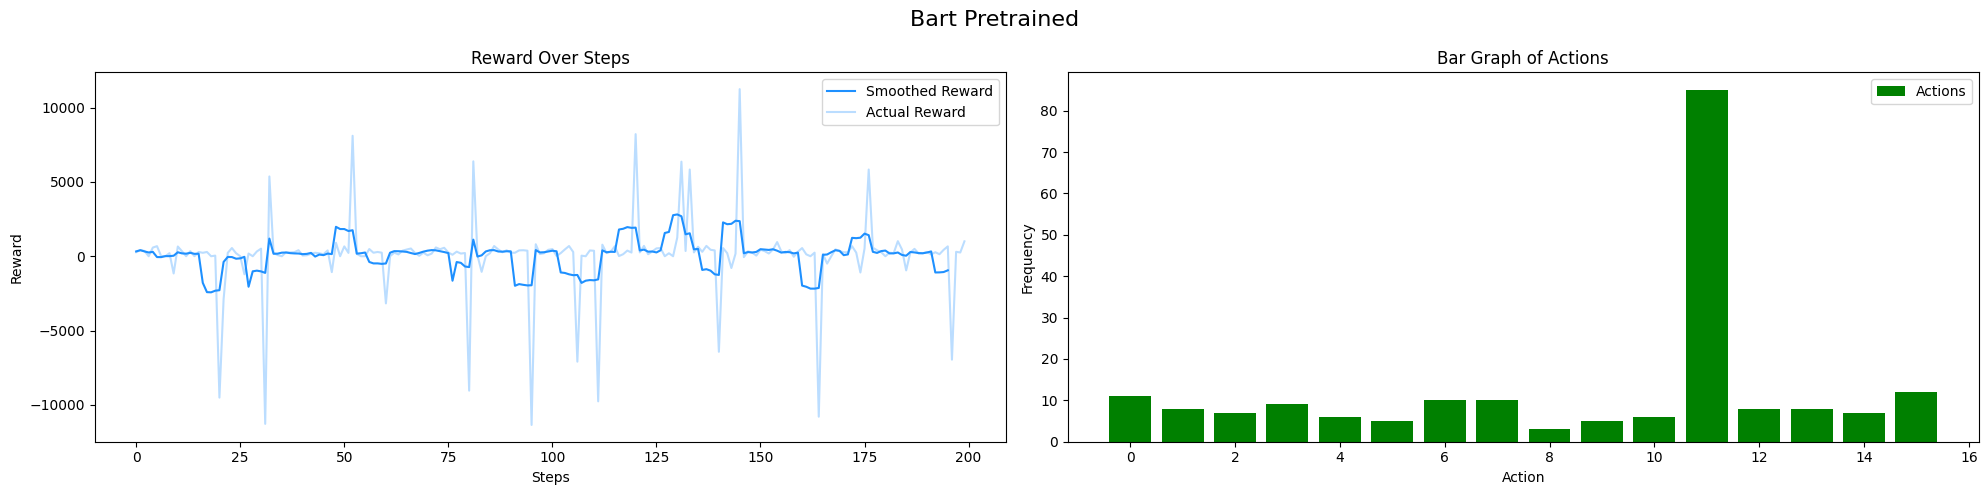

In [ ]:
e_actions = [float(item[0]) for item in episode_actions]
e_rewards = [float(item[0]) for item in episode_rewards]


N = 5
smoothed_rewards = np.convolve(np.squeeze(episode_rewards), np.ones(N)/N, mode='valid')


fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Plotting reward
axs[0].plot(smoothed_rewards, color='dodgerblue')
axs[0].plot(episode_rewards, color='dodgerblue', alpha=0.3)
axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Reward')
axs[0].set_title('Reward Over Steps')
axs[0].legend(['Smoothed Reward', 'Actual Reward'])

# Plotting bar graph of actions
unique_actions, action_counts = np.unique(np.concatenate(episode_actions), return_counts=True)
plt.bar(unique_actions, action_counts, color='green')
axs[1].set_xlabel('Action')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Bar Graph of Actions')
axs[1].legend(['Actions'])


fig.suptitle('Bart Pretrained', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
print(sum(e_rewards))
print(action_list_name[11])

13584.51528954506
delete_random_word


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualization

In [ ]:
# Convert the list of tensors to a single tensor
data_tensor = torch.stack(proxy_prob)

# Calculate the mean and standard deviation for each index
means = torch.mean(data_tensor, dim=0)
std_devs = torch.std(data_tensor, dim=0)

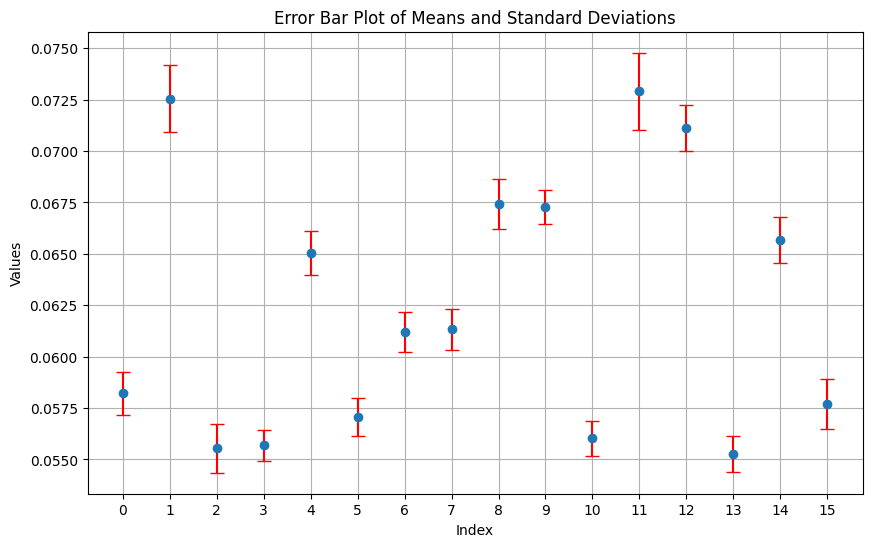

In [ ]:
means_np = means.cpu().detach().numpy()
std_devs_np = std_devs.cpu().detach().numpy()


# Data for plotting
indices = range(0, 16)

# Creating error bar plot
plt.figure(figsize=(10, 6))
plt.errorbar(indices, means_np[0], yerr=std_devs_np * 10, fmt='o', ecolor='red', capsize=5)
plt.title('Error Bar Plot of Means and Standard Deviations')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(indices)
plt.grid(True)
plt.show()



## finetuneing

In [15]:
from transformers import BartTokenizer, BartForConditionalGeneration, Trainer, TrainingArguments
from datasets import load_dataset

In [ ]:
# Initialize the model
def model_init():
    return BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Load the tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

def preprocess_data(examples):
    # Process articles and ensure they are strings
    articles = [str(action_list[11](example['article'])) if example['article'] is not None else "" for example in examples['info']]
    # Process summaries and ensure they are strings
    summaries = [str(summary['text']) if summary['text'] is not None else "" for summary in examples['summary']]

    model_inputs = tokenizer(articles, max_length=1024, padding="max_length", truncation=True)

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(summaries, max_length=128, padding="max_length", truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_datasets = dataset.map(preprocess_data, batched=True)


Parameter 'function'=<function preprocess_data at 0x788a95f13a30> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/6312 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/8585 [00:00<?, ? examples/s]

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    weight_decay=0.01,
    save_total_limit=1,
    num_train_epochs=1
)

# Initialize the Trainer
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=tokenized_datasets["test"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer
)

# Train the model
trainer.train()


Epoch,Training Loss,Validation Loss
1,0.340500,1.134441


TrainOutput(global_step=3156, training_loss=0.39155557944294167, metrics={'train_runtime': 5670.1884, 'train_samples_per_second': 1.113, 'train_steps_per_second': 0.557, 'total_flos': 1.3678764248530944e+16, 'train_loss': 0.39155557944294167, 'epoch': 1.0})

In [ ]:
# trainer.save_model("Bart Finetune/model")
# tokenizer.save_pretrained("Bart Finetune/tokenizer")

('content/tokenizer/tokenizer_config.json',
 'content/tokenizer/special_tokens_map.json',
 'content/tokenizer/vocab.json',
 'content/tokenizer/merges.txt',
 'content/tokenizer/added_tokens.json')

In [ ]:
# import os
# import zipfile

# def zip_directory(folder_path, output_filename):
#     with zipfile.ZipFile(output_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
#         for root, dirs, files in os.walk(folder_path):
#             for file in files:
#                 zipf.write(os.path.join(root, file),
#                            os.path.relpath(os.path.join(root, file),
#                                            os.path.join(folder_path, '..')))

# # Replace 'path_to_saved_model' with your model's directory
# model_path = 'content'
# zip_file = 'modelnlp.zip'

# zip_directory(model_path, zip_file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
from transformers import BartForConditionalGeneration, BartTokenizer

model = BartForConditionalGeneration.from_pretrained("Finetune/Bart Finetune/model")
tokenizer = BartTokenizer.from_pretrained("Finetune/Bart Finetune/tokenizer")


In [18]:
def generate_summary(text, max_length=130, min_length=30):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=max_length, min_length=min_length, length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Example text to be summarized
text_to_summarize = "Your input text goes here."

# Generate summary
summary = generate_summary(text_to_summarize)
print(summary)


summarize: your input text goes here. summarize.summarized.summerize.your input text go here.


In [19]:
class BARTEmbedder:
    def __init__(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = tokenizer = BartTokenizer.from_pretrained("Bart Finetune/tokenizer")
        self.model = BartForConditionalGeneration.from_pretrained("Bart Finetune/model").to(self.device)
        self.target_dim = 1024

    def get_embedding(self, text):
        # Tokenize with truncation
        inputs = self.tokenizer(text, return_tensors='pt', max_length=1024, truncation=True).to(self.device)
        with torch.no_grad():
            outputs = self.model(**inputs)
        embeddings = outputs.encoder_last_hidden_state
        embeddings = torch.mean(embeddings, dim=1)

        # Adjust the embedding to have the target dimension
        embedding_dim = embeddings.shape[1]
        if embedding_dim > self.target_dim:
            embeddings = embeddings[:, :self.target_dim]
        elif embedding_dim < self.target_dim:
            padding = torch.zeros((embeddings.shape[0], self.target_dim - embedding_dim)).to(self.device)
            embeddings = torch.cat([embeddings, padding], dim=1)

        return embeddings.cpu().numpy()


class NLPEnv(gym.Env):
    def __init__(self):
        super(NLPEnv, self).__init__()
        self.dataset = dataset
        self.current_word = None
        self.ground_truth = None
        self.embedder = BARTEmbedder()
        embedding_dim = 1024
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(embedding_dim,), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(16)

        action_list = [
          drop_stop_words,
          remove_punctuation,
          to_lowercase,
          negate_sentence,
          delete_random_character,
          insert_random_character,
          change_letter_case,
          apply_misspellings,
          repeat_random_character,
          replace_with_adjacent_character,
          swap_random_character,
          delete_random_word,
          perturb_word_order,
          repeat_random_word,
          toggle_singular_plural,
          change_verb_tense
      ]


    def reset(self):
        random_index = random.randint(0, len(self.dataset['test']['info']) - 1)
        self.current_word = self.dataset['test']['info'][random_index]['article'][:3400]
        self.ground_truth = self.dataset['test']['summary'][random_index]['text']
        return self.embedder.get_embedding(self.current_word)

    def step(self, action):

        prediction = action_list[action](self.current_word)
        bleu_score = calculate_bleu_score(prediction, generate_summary(prediction))

        reward = bleu_score*(len(prediction) - len(self.current_word))

        print(f'Action: {action_list_name[action]} Word length: {len(self.current_word)} Prediction length: {len(prediction)} Reward: {reward}')
        done = True

        return self.embedder.get_embedding(prediction), reward, done, {'current_word': self.current_word}


In [20]:
env = DummyVecEnv([lambda: NLPEnv()])
dqn_model = DQN("MlpPolicy", env, verbose=1, exploration_final_eps=0.6, exploration_initial_eps=1.0)#DQN model

Using cuda device


/home/local/ASURITE/bpathir1/miniconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [23]:
dqn_model = DQN.load('RL models/dqn_bart_RLretrained.zip')

In [ ]:
episode_rewards = []
episode_actions = []


for episode in range(200):
    print(f"Episode: {episode}")
    done = False
    obs = env.reset()
    # q_values = dqn_model.policy.q_net(torch.tensor(obs, dtype=torch.float32))
    # action_probabilities = torch.nn.functional.softmax(q_values, dim=1)
    # proxy_prob.append(action_probabilities)
    while not done:
        action, _ = dqn_model.predict(obs)
        obs, reward, done, info = env.step(action)
        print(f'Actions : {action}, Reward: {reward}')
        episode_rewards.append(reward)
        episode_actions.append(action)

Episode: 0
Action: apply_misspellings Word length: 3400 Prediction length: 3400 Reward: 0.0
Actions : [7], Reward: [0.]
Episode: 1
Action: perturb_word_order Word length: 2655 Prediction length: 2690 Reward: 134.59436757341604
Actions : [12], Reward: [134.59436]
Episode: 2
Action: perturb_word_order Word length: 2943 Prediction length: 2987 Reward: 228.71888962000546
Actions : [12], Reward: [228.71889]
Episode: 3
Action: repeat_random_word Word length: 3400 Prediction length: 3425 Reward: 195.4309792585555
Actions : [13], Reward: [195.43098]
Episode: 4
Action: swap_random_character Word length: 3400 Prediction length: 3437 Reward: 142.43527401317647
Actions : [10], Reward: [142.43527]
Episode: 5
Action: perturb_word_order Word length: 2384 Prediction length: 2400 Reward: 73.20727702453117
Actions : [12], Reward: [73.207275]
Episode: 6
Action: remove_punctuation Word length: 3109 Prediction length: 3039 Reward: -574.2190446669815
Actions : [1], Reward: [-574.21906]
Episode: 7
Action: pe

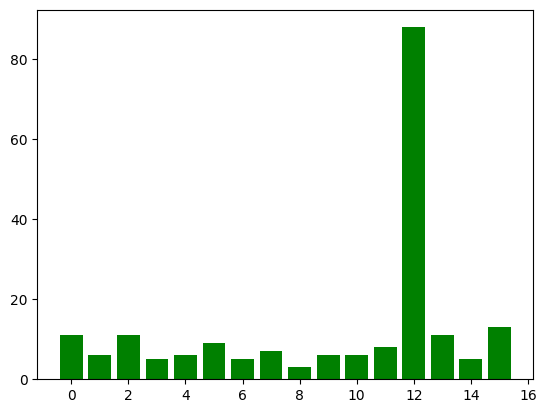

In [ ]:
unique_actions, action_counts = np.unique(np.concatenate(episode_actions), return_counts=True)
plt.bar(unique_actions, action_counts, color='green')
plt.show()